# Requirements

Examples presented in this notebook require <em>crystgrowthpoly</em>  library. <br />
You can find instruction of library installation  in README.md.<br />
Before running examples please run the cell below. Please adjust path to input files  if necessary.

In [1]:
import crystgrowthpoly as cryst
input_files_directory = "./tessellations/" # Path to input files

# Examples from the paper



## Example 3.2


In [3]:
tes = cryst.read_tessellation_from_file(input_files_directory + "topologically_distinct_tillings/4444.txt")
for f in tes.get_growth_polynomials(symmetric_growth=False, normalized=False):
    f.show()

f_0 (n_1, n_2) '=' 4*n_1*n_2 + 2*n_1 + 2*n_2 + 1

f_1 (n_1, n_2) '=' 8*n_1*n_2 + 2*n_1 + 2*n_2

f_2 (n_1, n_2) '=' 4*n_1*n_2

## Topological growth functions



In [12]:
"""
Following code generates table of growth functions for polygonal units filling the plane
by translations corresponding to eleven topologically distinct types of planar tillings.
"""
rows_list = [["Type", "$f_0(n_1,n_2)$",  "$f_1(n_1,n_2)$",  "$f_2(n_1,n_2)$"]]

tessellation_types = ("4444", "333333", "666", "884", "44333",
                      "43433", "6363", "6434", "1264", "12123", "63333")

for tes_type in tessellation_types:
    tes = cryst.read_tessellation_from_file(input_files_directory + "topologically_distinct_tillings/" + tes_type + ".txt")
    row = list()
    row.append(tes_type)
    for f in tes.get_growth_polynomials(symmetric_growth=False):
        row.append(f.polynomials[0])
    rows_list.append(row)
table(rows = rows_list, header_row = True, header_column = True)

Type,,,
4444,,,
333333,,,
666,,,
884,,,
44333,,,
43433,,,
6363,,,
6434,,,
1264,,,
12123,,,


## Orphic diagrams

In [117]:
import crystgrowthpoly as cryst
# Read tessellation from the file
def generate_description(file_path):
    tes = cryst.read_tessellation_from_file(file_path, cartesian_vectors_included=True,
                                            crystallographic_coordinates=True)
    return cryst.visualisation.find_regions(tes, symmetric_growth=False, full_plot=True)

def save_in_ps_and_png(filename, graph, figsize):
    graph.save("output/" + filename + ".ps", figsize = figsize, aspect_ratio=1, axes=False, fig_tight = True)
    graph.save("output/" + filename + ".png", figsize=figsize, aspect_ratio=1, axes=False, fig_tight=True)

def avoid_cutting_image(plott, scale = 0.0001):
    x_len = (plott.xmax() - plott.xmin()) * scale
    y_len = (plott.ymax() - plott.ymin()) * scale
    return (polygon((
        (plott.xmin() - x_len, plott.ymin() - y_len ), (plott.xmax() + x_len, plott.ymin() - y_len),
        (plott.xmax() + x_len, plott.ymax() + y_len),(plott.xmin() - x_len, plott.ymax() + y_len)), alpha=0) + plott)

def generate_and_save_plots(filename, desc, figsize = [6.4, 4.8], lines_thickness = 8, point_size=600, colors_lists=(None, None),
                           polygon_thickness = 2, scale = 0.1):
    plots = tuple(avoid_cutting_image(p, scale) for p in desc.get_plots(lines_thickness = lines_thickness, point_size=point_size,
                                       colors_lists=colors_lists, polygon_thickness = polygon_thickness))
    plots[0].show(axes=False, aspect_ratio=1)
    plots[1].show(axes=False, aspect_ratio=1)
    save_in_ps_and_png(filename, plots[1], figsize=figsize)
    save_in_ps_and_png(filename + "_parallelogram", plots[0], figsize=figsize)

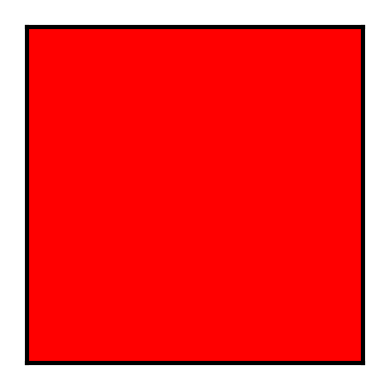

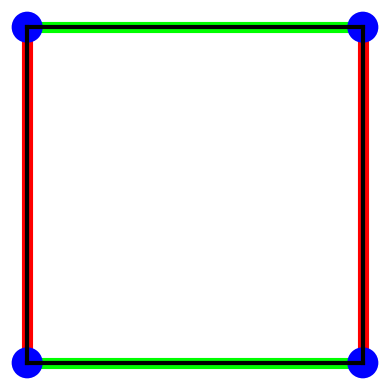

In [110]:
# Generating orphic diagrams for tessellation 4444
regs_description = generate_description("./tessellations/topologically_distinct_tillings/4444.txt")
gs = generate_and_save_plots("4444",regs_description, figsize=(5.092765957, 3.819574468),
                             lines_thickness = 8, point_size=500, scale=0.03, polygon_thickness = 3)

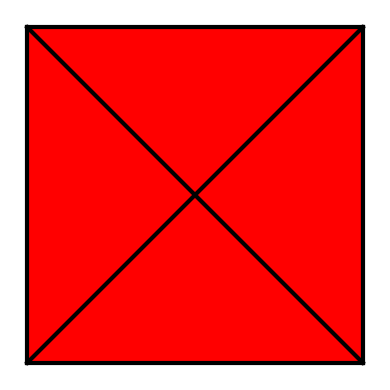

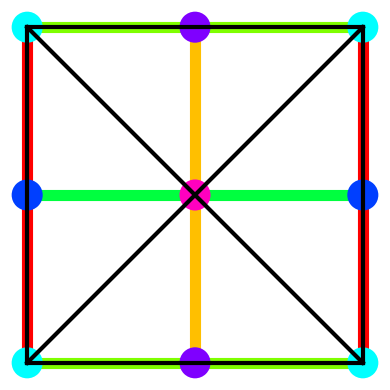

In [111]:
regs_description = generate_description("./tessellations/topologically_distinct_tillings/884.txt")
gs = generate_and_save_plots("884",regs_description, figsize=(5.092765957, 3.819574468), lines_thickness = 8, point_size=500, scale=0.03, polygon_thickness = 3)

In [112]:
on = generate_description("./tessellations/topologically_distinct_tillings/43433.txt")
#generate_and_save_plots(regs_description, lines_thickness = 4, point_size=50)

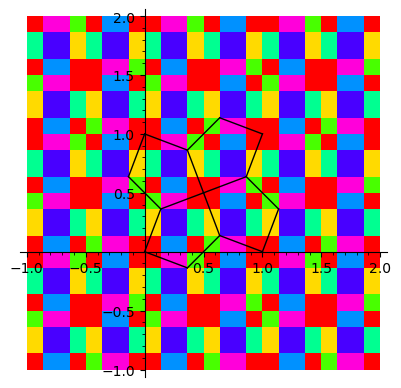

In [115]:
on.get_plots()[0]

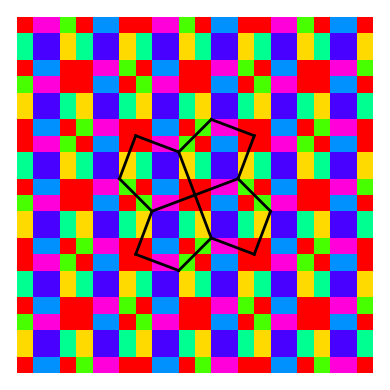

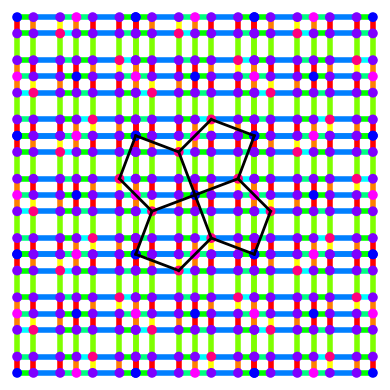

In [118]:
generate_and_save_plots("43433", on, figsize=(5.092765957, 3.819574468),
                       lines_thickness = 4, point_size=50, scale =0.00005)

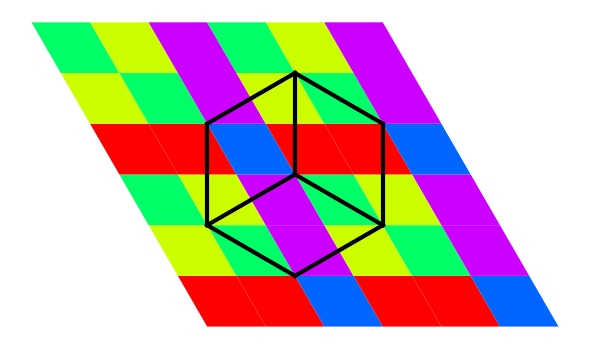

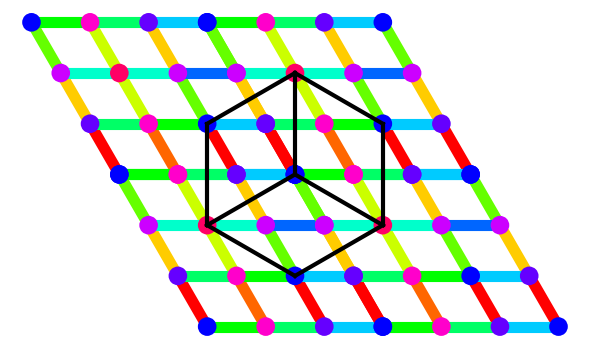

In [119]:
regs_description = generate_description("./tessellations/centered/6363_centered.txt")
gs = generate_and_save_plots("6363", regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

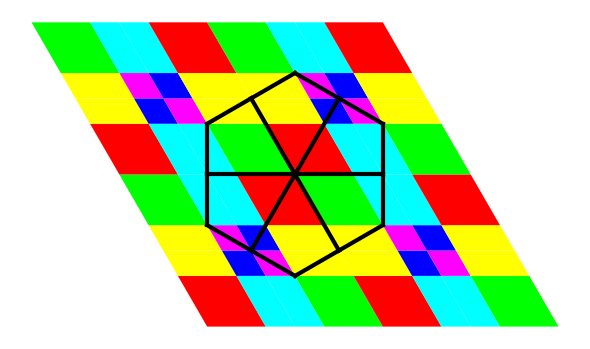

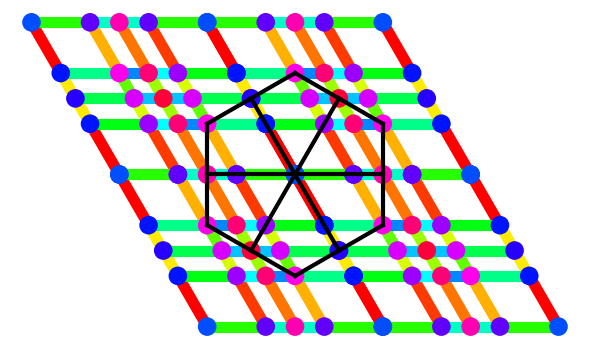

In [120]:
regs_description = generate_description("./tessellations/centered/6434_centered.txt")
gs = generate_and_save_plots("6434", regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

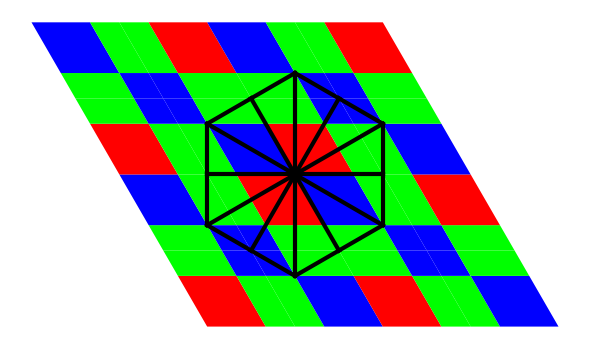

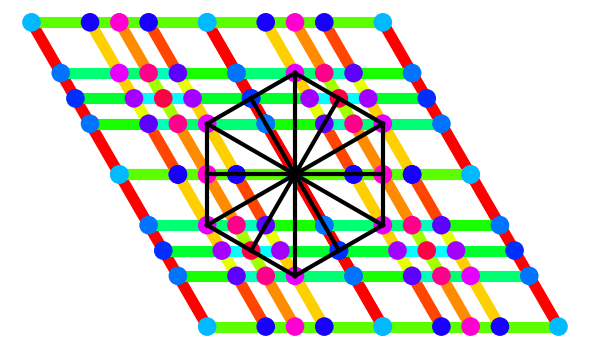

In [121]:
regs_description = generate_description("./tessellations/topologically_distinct_tillings/1264.txt")
gs = generate_and_save_plots("1264", regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

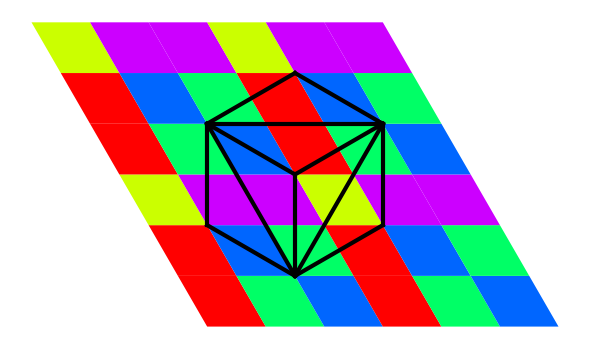

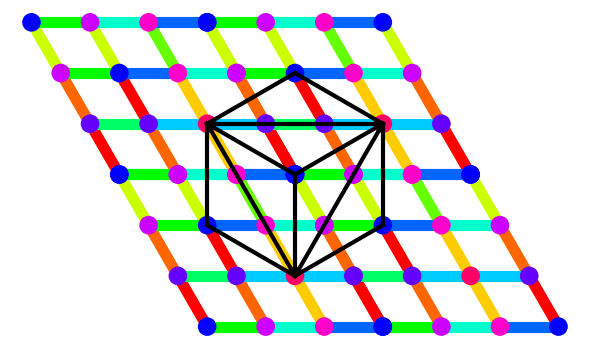

In [122]:
regs_description = generate_description("./tessellations/centered/12123_centered.txt")
gs = generate_and_save_plots("12123", regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

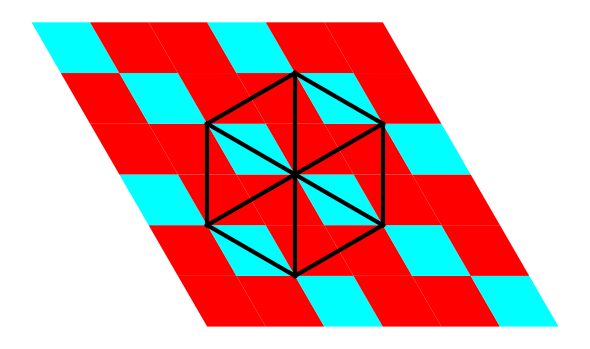

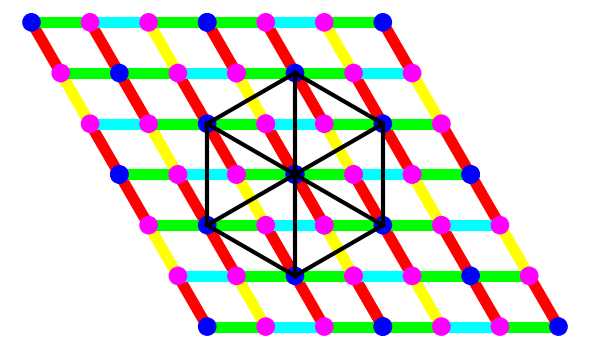

In [123]:
regs_description = generate_description("./tessellations/centered/666_centered.txt")
gs = generate_and_save_plots("666",regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

In [124]:
regs_description = generate_description("./tessellations/topologically_distinct_tillings/63333.txt")

In [3]:
regs_description.get_colors_num()

(13, 30)

In [125]:
colo = ["pink", "green", "orange", "deeppink", "yellow", "blue", "aqua",
        "dimgray", "lime", "red", "purple", "cornflowerblue", "brown"]

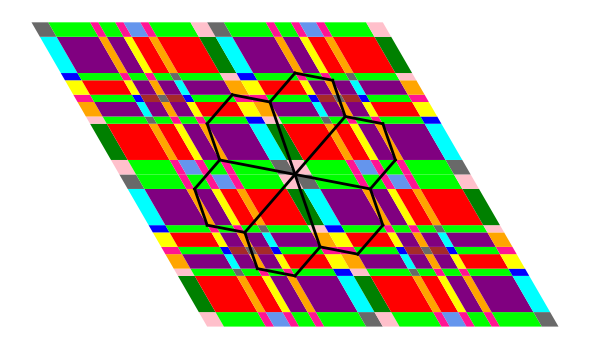

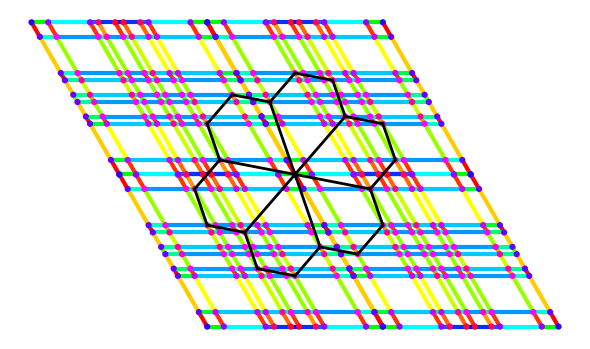

In [126]:
generate_and_save_plots("63333",regs_description, lines_thickness = 3, point_size=20, scale = 0.02,
                        colors_lists=(colo, rainbow(30)))

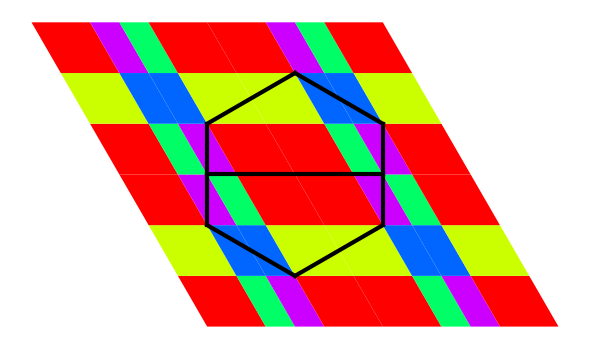

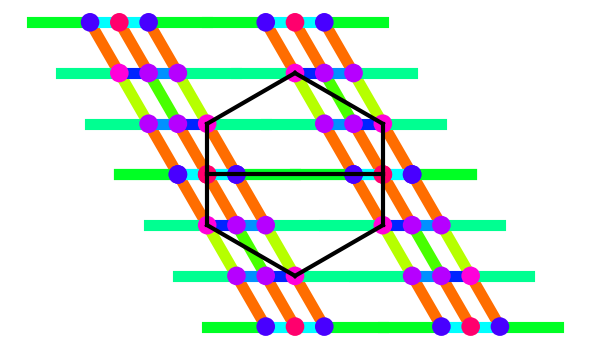

In [127]:
regs_description = generate_description("./tessellations/centered/44333_centered.txt")
gs = generate_and_save_plots("44333",regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

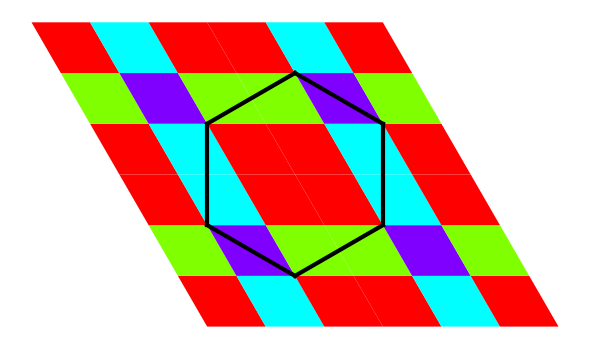

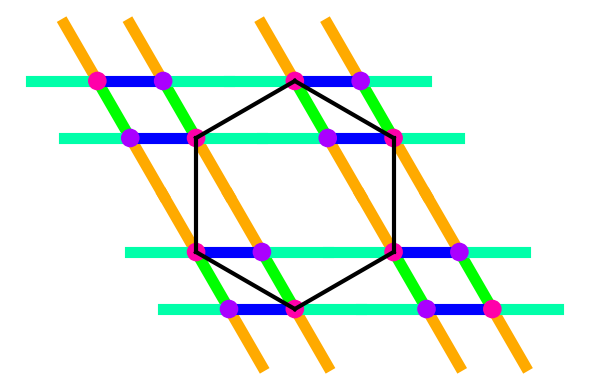

In [128]:
# Generating orphic diagrams for tessellation 33333
regs_description = generate_description("./tessellations/centered/333333_centered.txt")
gs = generate_and_save_plots("333333", regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

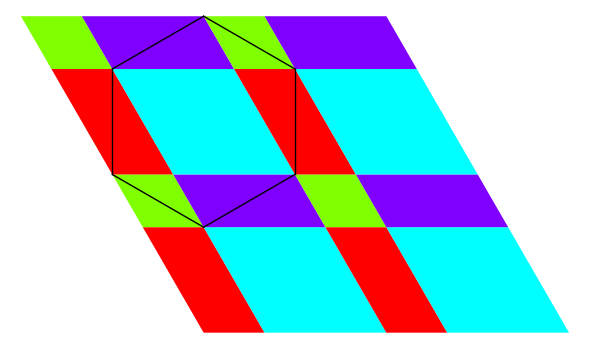

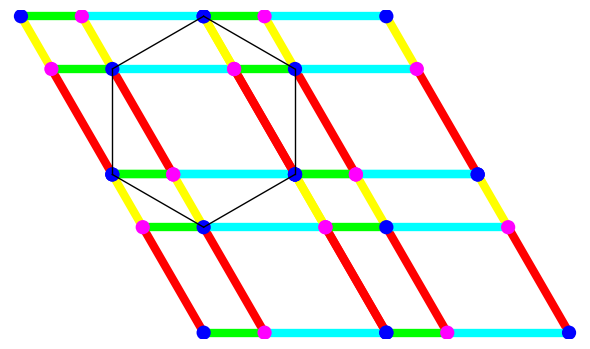

In [4]:
# Generating orphic diagrams for tessellation 33333
regs_description = generate_description("./tessellations/topologically_distinct_tillings/333333.txt")
generate_and_save_plots(regs_description)

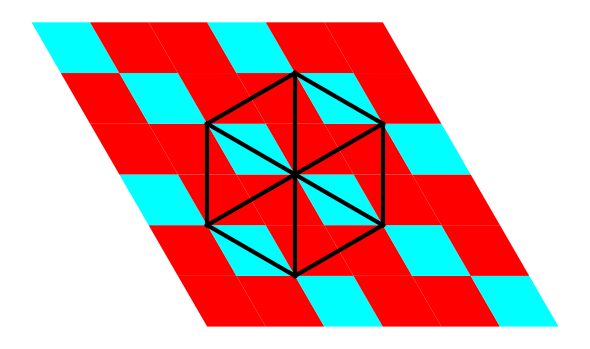

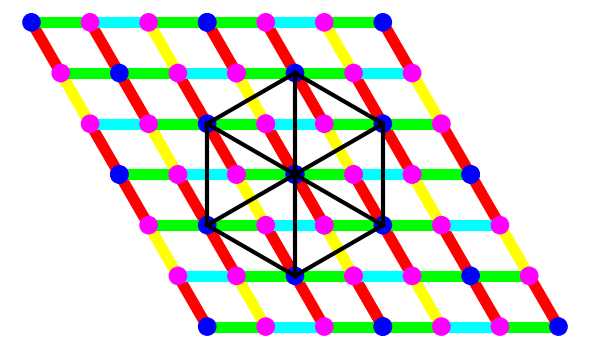

In [130]:
regs_description = generate_description("./tessellations/centered/666_centered.txt")
gs = generate_and_save_plots("666", regs_description, lines_thickness = 8, point_size=180, scale=0.02, polygon_thickness = 3)

## Identification of a tiling with growth functions

In [10]:
"""
In this section simulation described in the paper's subsection 6.2. "Identification of a tiling with growth functions" is performed.
"""

import random
"""
@brief Function returning number of vertices in fragment of distorted tessellation
@param args Numbers of steps in each direction
@param missing_points Central nodes removed from tessellation 884
@return Number of vertices in fragment of distorted tessellation
"""
def value_generator_for_random(args, missing_points, i, j):
    acc_missing = 0
    for ii in range(args[0]):
        for jj in range(args[1]):
            if (1 + ii * 2 + i * 4, 1 + jj * 2 + j * 4) in missing_points:
                acc_missing = acc_missing + 1
    return 2 * args[0] * args[1] + args[0] + args[1] + 1 - acc_missing


"""
This function generates distorted tessellation, calculates growth functions starting in n^2 different point and return averaged results
Distorted tessellation is created by randomly removing central nodes from tessellation 884

@param p Probability of removing central node
@param n Square root of number of starting points
@return Averaged and rounded polynomial coefficients
"""
def random_test(p, n):
    missing_points = []
    # In this loop we draw central nodes to be removed from tesselation 884
    for i in range(4 * n):
        for j in range(4 * n):
            if random.random() > p:
                missing_points.append((1 + i * 2, 1 + j * 2))
    # Calculate polynomials starting in different points
    pol = [0,0,0,0]
    args = [(1,1), (1,2), (2,1), (2,2)]
    for i in range(n):
        for j in range(n):
            val_gen = lambda arg: value_generator_for_random(arg, missing_points, i, j)
            new_pol = cryst.private.find_poly(val_gen, args, symmetric_growth = False)[0] # Polynomial calculated startig at point (i, j)
            for k in range(4):
                pol[k] = pol[k] + new_pol[k]
    # Return averaged polynomial
    return [round(a/(n*n)) for a in pol]

"""
@brief This function calculates how many times modified tessellation is clasified as 884 and 4444
@param p Probability of removing central node
@param n Square root of number of starting points
@return Triple constisting of numbers of calculated polynomials in following categories: 884, 4444, Other
"""
def get_proportions(p, n):
    counter_884 = 0
    counter_4444 = 0
    for i in range(1000):
        pol = random_test(p, n)
        if pol == [2,1,1,1]:
            counter_884 = counter_884 + 1
        elif pol == [1, 1, 1, 1]:
            counter_4444 = counter_4444 + 1
    return (counter_884, counter_4444, 1000 - counter_884 - counter_4444)

probabilities = [0.01, 0.1, 0.2,  0.5,  0.8, 0.9, 0.99] # Probabilities of removing central node
ns = [1,2,3,4]
rows= [["p\\n",1,4,9,16]]
for p in probabilities:
    r = ["{:10.2f}".format(p)]
    for n in ns:
        r.append('''[884] {0[0]} ||
        [444] {0[1]} ||
        Other {0[2]}'''.format(get_proportions(p, n)))
    rows.append(r)
table(rows, header_row=True, header_column=True)

p\n,,,,
0.01,[884] 0 || [444] 962 || Other 38,[884] 1 || [444] 998 || Other 1,[884] 0 || [444] 1000 || Other 0,[884] 0 || [444] 1000 || Other 0
0.10,[884] 0 || [444] 654 || Other 346,[884] 23 || [444] 822 || Other 155,[884] 0 || [444] 994 || Other 6,[884] 0 || [444] 999 || Other 1
0.20,[884] 0 || [444] 403 || Other 597,[884] 93 || [444] 575 || Other 332,[884] 10 || [444] 921 || Other 69,[884] 5 || [444] 986 || Other 9
0.50,[884] 73 || [444] 75 || Other 852,[884] 424 || [444] 115 || Other 461,[884] 439 || [444] 425 || Other 136,[884] 567 || [444] 381 || Other 52
0.80,[884] 403 || [444] 1 || Other 596,[884] 672 || [444] 2 || Other 326,[884] 925 || [444] 12 || Other 63,[884] 981 || [444] 2 || Other 17
0.90,[884] 648 || [444] 1 || Other 351,[884] 837 || [444] 0 || Other 163,[884] 988 || [444] 0 || Other 12,[884] 999 || [444] 0 || Other 1
0.99,[884] 959 || [444] 0 || Other 41,[884] 998 || [444] 0 || Other 2,[884] 1000 || [444] 0 || Other 0,[884] 1000 || [444] 0 || Other 0


## 3D Examples

In [7]:
"""
Following code generates table of growth functions of example 3-dimmenstional tessellations.
Generated table corresponds to Table 25 in the paper.
"""
rows_list = [["Group", "Vertices",  "Edges",  "Faces", "Interiors"]]
file_paths = ("p23.txt", "Pm3.txt", "p432.txt", "pm3m3.txt")
names = ("$P23$", "$Pm\\overline{3}$", "$P432$ and $P4\\overline{3}m$", "$Pm\\overline{3}m$")
for i in range(len(names)):
    tes = cryst.read_tessellation_from_file(input_files_directory + "/3d/"
                                            + file_paths[i], cartesian_vectors_included=False, dim=3)
    row = list()
    row.append(names[i])
    for f in tes.get_growth_polynomials(symmetric_growth=True):
        row.append(f.polynomials[0])
    rows_list.append(row)
table(rows = rows_list, header_row = True, header_column = True)

Group,Vertices,Edges,Faces,Interiors
,,,,
,,,,
and,,,,
,,,,


# Additional examples

## Orphic diagrams with description

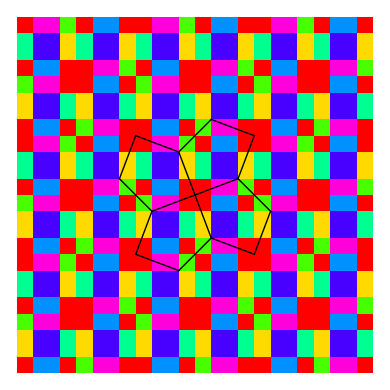

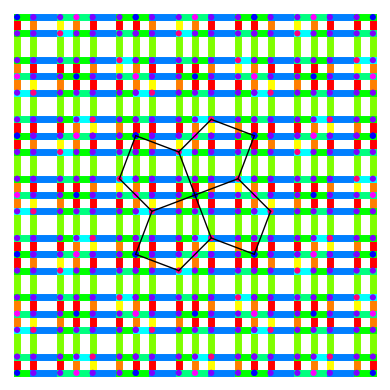

***************************
For x_0 in


AttributeError: 'Tessellation' object has no attribute 'v1'

In [35]:
# Generating orphic diagrams for tessellation 43433
tes = cryst.read_tessellation_from_file(input_files_directory + "topologically_distinct_tillings/" + "43433.txt", cartesian_vectors_included=True)
tes.plot_domains(full_plot=True, symmetric_growth = False)